In [1]:
%matplotlib inline
import sys 
sys.path.append('../../../')
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import gpflow, gpitch

In [2]:
gpitch.amtgp.init_settings()
plt.rcParams['figure.figsize'] = (18, 5)  # set plot size

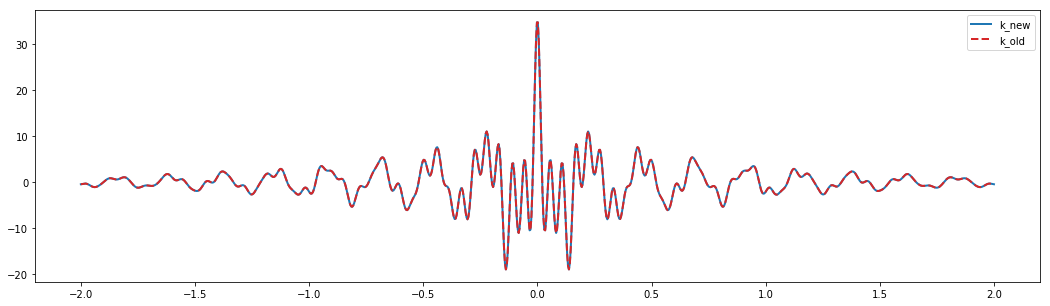

In [31]:
N = 1000
x = np.linspace(-2., 2., N).reshape(-1, 1)

var = 10*np.random.rand(8)
leng = np.random.rand(8)
freq = 20*np.random.rand(8)

k_new = gpitch.kernels.MaternSpecMix(input_dim=1, lengthscales=leng, variances=var, 
                                     frequencies=freq)
k_old = gpitch.amtgp.Matern12CosineMix(variance=var, lengthscale=leng, period=1.0/freq, 
                                       Nh=var.size)
k_new_plot = k_new.compute_K(x, np.asarray(0.).reshape(-1,1))
k_old_plot = k_old.compute_K(x, np.asarray(0.).reshape(-1,1))

plt.figure()
plt.plot(x, k_new_plot, lw=2)
plt.plot(x, k_old_plot, '--C3', lw=2)
plt.legend(['k_new','k_old'])